In [1]:
import birdwatcher as bw
from birdwatcher.plotting import imshow_frame
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
vf = bw.testvideosmall()

Detect movement with knn algorithm. It returns 3 arrays:
    - cd, coordinate data: which pixels were above threshold in each frame
    - cc, coordinate count: sum of pixels that were above threshold in each frame
    - cm, coordinate mean: the spatial mean of pixels thatwere above threshold in each frame
    
These arrays are disk-based. I.e. they are written to file in the same directory, and can be accessed directly using the library Darr.

In [3]:
%%time
cd, cc, cm = bw.detect_movementknn(vf.filepath, ignore_firstnframes=20)

CPU times: user 1min 31s, sys: 248 ms, total: 1min 31s
Wall time: 12.8 s


/home/gabriel/anaconda3/lib/python3.6/site-packages/birdwatcher-0.1.0+25.g112038d-py3.6.egg/birdwatcher/movementdetection.py:209: RuntimeWarning: Mean of empty slice.
  return np.array([idx.mean(0) for idx in coords.iter_arrays()])
/home/gabriel/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


The darr arrays can be indexed, which will return a numpy array

Text(0,0.5,'number of pixels')

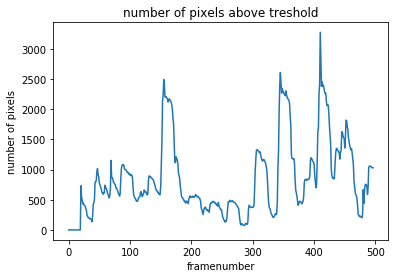

In [4]:
plt.plot(cc[:])
plt.title('number of pixels above treshold')
plt.xlabel('framenumber')
plt.ylabel('number of pixels')

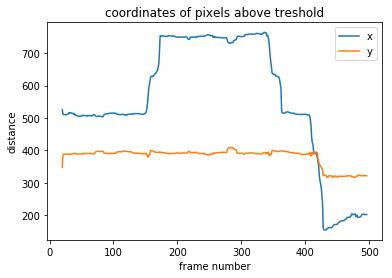

In [10]:
plt.plot(cm[:])
plt.title('coordinates of pixels above treshold')
plt.xlabel('frame number')
plt.ylabel('distance')
plt.legend(['x', 'y'])

The situation for the raw coordinate data is more complex. You first index the frame you want, which returns an array of pixel coordinates. The number of pixels is variable.

In [6]:
cd_200 = cd[200]
print(cd_200)

[[766 367]
 [767 367]
 [768 367]
 ...
 [717 413]
 [718 413]
 [719 413]]


If you want to image the pixels, this can be done conveniently as so

In [7]:
frame = cd.get_frame(200)

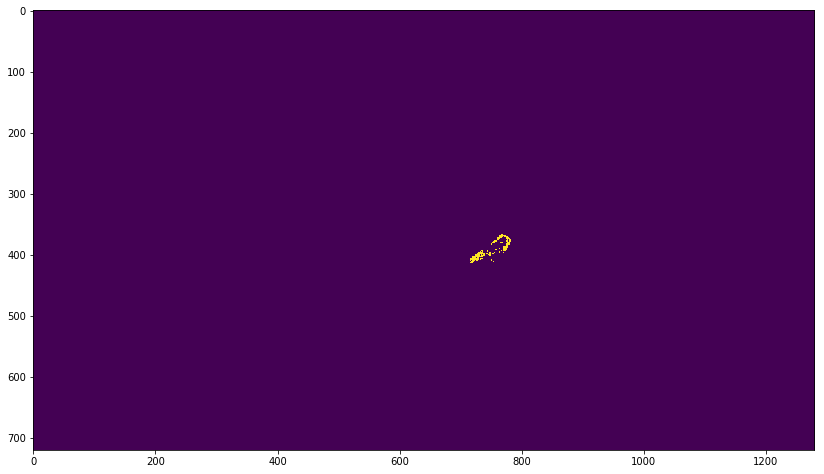

In [8]:
imshow_frame(frame)

let's look at the original frame

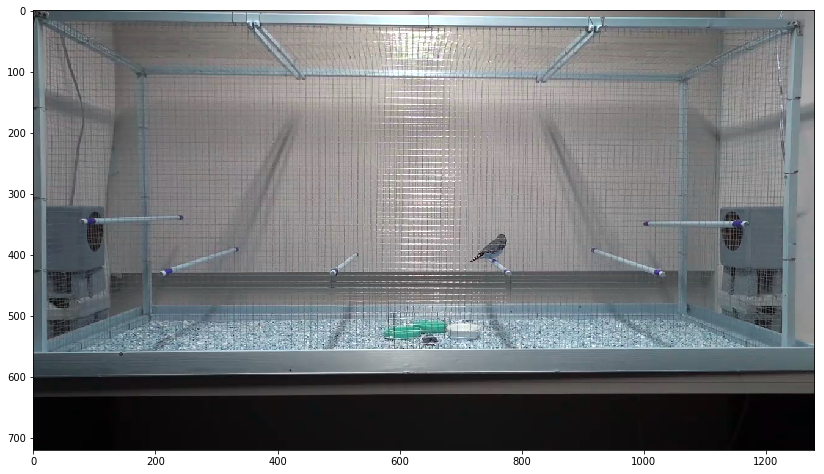

In [9]:
imshow_frame(vf.get_framebynumber(200))